In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import itertools
import seaborn as sns

In [2]:
df_parts = pd.read_csv('data/parts.csv')
df_parts_categories = pd.read_csv('data/part_categories.csv')
df_inventories = pd.read_csv('data/inventories.csv')
df_inventories_parts = pd.read_csv('data/inventory_parts.csv')
df_sets = pd.read_csv('data/sets.csv')

print (df_sets.head())

df_PARTS = pd.merge(df_parts,df_parts_categories,left_on='part_cat_id',right_on='id',how='left',suffixes=['_part','_cat'])

df_PARTS.head()

df_SETS = pd.merge(df_inventories_parts,df_inventories,left_on='inventory_id',right_on='id',how='left')
df_SETS = pd.merge(df_SETS,df_sets,on='set_num',how='left')
df_SETS = pd.merge(df_SETS,df_PARTS[['part_num','name_part','name_cat']],on='part_num',how='left')
df_SETS.head()

  set_num                        name  year  theme_id  num_parts
0    00-1             Weetabix Castle  1970       414        471
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          2
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


,inventory_id,part_num,color_id,quantity,is_spare,id,version,set_num,name,year,theme_id,num_parts,name_part,name_cat
0,1,48379c01,72,1,f,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Sports Promo Figure Base with Feet,Minifig Accessories
1,1,48395,7,1,f,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Sports Promo Snowboard from McDonald's Sports ...,Minifig Accessories
2,1,mcsport6,25,1,f,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Sports Promo Figure Head Torso Assembly McDona...,Minifigs
3,1,paddle,0,1,f,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Sports Promo Paddle from McDonald's Sports Sets,Minifig Accessories
4,3,11816pr0005,78,1,f,3,1,3931-1,Emma's Splash Pool,2012,494,43,"Minifig Head Modified - Friends - Green Eyes, ...",Minifigs


In [3]:
df_6075_2_BOM = df_SETS[df_SETS.set_num=='6075-2']
df_6075_2_BOM.groupby('name_cat').count()
print (df_6075_2_BOM.name_cat.unique())
CATEGORIES_TO_EXCLUDE = ['Flags, Signs, Plastics and Cloth','Minifigs','Minifig Accessories']

['Bricks' 'Plates' 'Bricks Sloped' 'Bricks Round and Cones' 'Tiles'
 'Windows and Doors' 'Plates Special' 'Bars, Ladders and Fences'
 'Bricks Curved' 'Bricks Special' 'Flags, Signs, Plastics and Cloth'
 'Minifigs' 'Technic Pins' 'Technic Bricks' 'Hinges, Arms and Turntables'
 'Minifig Accessories' 'Baseplates' 'String, Bands and Reels']


In [4]:
f_6075_2_BOM = df_SETS[df_SETS.set_num=='6075-2']
df_6075_2_BOM = df_6075_2_BOM[~df_6075_2_BOM.name_cat.isin(CATEGORIES_TO_EXCLUDE)]
df_6075_2_BOM = df_6075_2_BOM.groupby(['part_num'])[['quantity']].sum().reset_index()
print (df_6075_2_BOM.info())
print (df_6075_2_BOM.quantity.sum())
df_6075_2_BOM.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
part_num    45 non-null object
quantity    45 non-null int64
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes
None
676


,part_num,quantity
0,3002a,12
1,3003,16
2,3004,195
3,3005,73
4,3008,15


In [5]:
CASTLE_PARTS = df_6075_2_BOM.part_num.unique()

In [19]:
#df_SETS =df_SETS[(df_SETS.year>2008) | (df_SETS.set_num=='6075-2')]
df_SETS = df_SETS[~df_SETS.name_cat.isin(CATEGORIES_TO_EXCLUDE)]
df_SETS_BOM= df_SETS.groupby(['set_num','part_num','name'])[['quantity']].sum()
df_SETS_BOM.reset_index(inplace=True)
df_SETS_BOM.head()
#df_SETS_BOM = df_SETS_BOM[df_SETS_BOM.part_num.isin(CASTLE_PARTS)]

,set_num,part_num,name,quantity
0,00-1,29c01,Weetabix Castle,14
1,00-1,3001a,Weetabix Castle,38
2,00-1,3002a,Weetabix Castle,22
3,00-1,3003,Weetabix Castle,12
4,00-1,3004,Weetabix Castle,115


In [20]:
df_BOM_SETS = df_SETS_BOM.pivot(index='set_num', columns='part_num', values='quantity')

In [21]:
df_BOM_SETS = df_BOM_SETS.fillna(0)

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_BOM_SETS) 
df_BOM_SETS.loc[:,:] = scaled_values

In [23]:
df_BOM_SETS.head()

part_num,0687b1,0901,0902,0903,0904,1,10016414,10019stk01,10026stk01,10029stk01,...,x979,x979pb01,x988,xleash,xleash3,zbb013,zbb014,zbb015,zbb018,zbb022
set_num,,,,,,,,,,,,,,,,,,,,,
00-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
005-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_BOM_SETS))
df_pca.columns = ['PCA1','PCA2']
df_pca.index = df_BOM_SETS.index
print (df_pca.shape)
df_pca = pd.merge(df_pca,df_sets[['set_num','year']], left_index=True,right_on='set_num',how='inner')
print (df_pca.shape)

(10350, 2)
(10350, 4)


In [26]:
df_pca.head()

,PCA1,PCA2,set_num,year
0,-0.012207,-0.060899,00-1,1970
8,-0.080847,0.017984,00-2,1976
9,-0.083184,0.020213,00-3,1976
10,-0.083844,0.023686,00-4,1976
11,-0.093219,0.042248,005-1,1965


In [27]:
pca.explained_variance_.sum()

0.081969255927474144

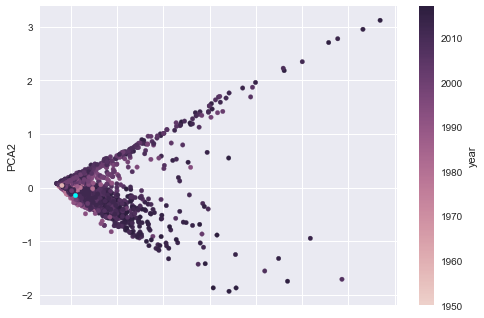

In [28]:
cmap = sns.cubehelix_palette(as_cmap=True)
ax =df_pca.plot.scatter(x='PCA1',y='PCA2',c='year',cmap=cmap)
df_pca[df_pca.set_num=='6075-2'].plot.scatter(x='PCA1',y='PCA2',ax=ax,color='cyan')


In [29]:
castle_pca1=df_pca.loc['6075-2'].PCA1
castle_pca2=df_pca.loc['6075-2'].PCA2


KeyError: 'the label [6075-2] is not in the [index]'

In [ ]:
df_pca['distance_to_Castle']= np.sqrt((df_pca['PCA1']-castle_pca1)**2+(df_pca['PCA2']-castle_pca2)**2)

In [ ]:
df_pca.sort_values(by='distance_to_Castle')